In [45]:
import matplotlib.image as img
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.vq import kmeans

In [46]:
image = img.imread('sea.jpeg')
image.shape

(333, 500, 3)

In [47]:
# Collect all pixels and assign them to their respective lists
r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r) 
        g.append(temp_g) 
        b.append(temp_b)

In [48]:
# create pandas dataframe
pixels = pd.DataFrame({'red': r, 'green': g, 'blue': b})
pixels.head()

,red,green,blue
0,186,216,227
1,186,216,227
2,186,216,227
3,185,215,226
4,185,215,226


In [49]:
# we need to scale the pixel values. Here we used the whiten method to normalize the data
from scipy.cluster.vq import whiten

pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])
pixels.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,186,216,227,2.186420,3.495326,4.103525
1,186,216,227,2.186420,3.495326,4.103525
2,186,216,227,2.186420,3.495326,4.103525
3,185,215,226,2.174665,3.479144,4.085448
4,185,215,226,2.174665,3.479144,4.085448


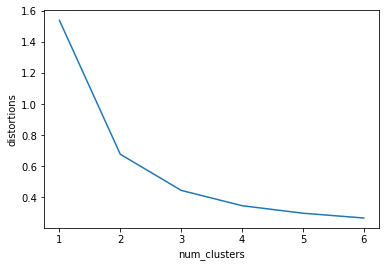

In [50]:
distortions = []
num_clusters = range(1, 7)

for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters':num_clusters,
                            'distortions': distortions})
sns.lineplot(x='num_clusters', y = 'distortions', data= elbow_plot)
plt.xticks(num_clusters)
plt.xlabel('num_clusters')
plt.ylabel('distortions')
plt.show()

In [51]:
# from the above point we can see that there are 2 clusters

# find dominant colors

colors = []

cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']],2)

# find actual color value (before normalization)

r_std, g_std, b_std = pixels[['red', 'blue', 'green']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
colors

[(0.22753411843031204, 0.47305727669921044, 0.41945589263352534),
 (0.8255134212495358, 0.8501460189863272, 0.8474121526203539)]

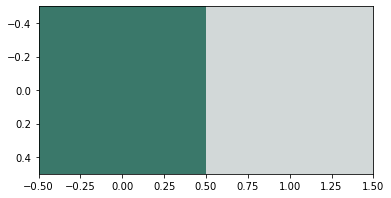

In [52]:
plt.imshow([colors])
plt.show()
# here we can see the dominant colors in the image